# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paying customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly.

This project will focus on the following objectives:
* Analyzing and building an ML model to help identify which leads are more likely to convert to paying customers
* Finding the factors driving the lead conversion process
* Creating a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paying customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries to manipulate data and compute mathematical operations
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Methods for splitting the data and performing grid search
from sklearn.model_selection import train_test_split, GridSearchCV

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report


##Loading the data

In [2]:
# Connecting to Drive to import the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the data
data = pd.read_csv('/content/drive/MyDrive/Github/ExtraaLearn.csv')

## Data Overview

We will begin by examining the first 5 rows of the dataset.

In [4]:
# Looking at the first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Observations:
* The column 'ID' may have a unique value for each row. We will validate this later.
* 'page_views_per_visit' is an average so we have decimals in those values.

In [5]:
# Checking for the number of rows and columns
data.shape

(4612, 15)

The dataset has 4,612 rows and 15 columns

In [6]:
# Identifying columns for which every row has a different value
for col in data.columns:
  if data[col].nunique() == data.shape[0]:
    print(col)

ID


We have confirmed that every row has a unique ID. We will drop this column because it will not add value to the model.

In [7]:
# Dropping the 'ID' column
data.drop('ID', axis=1, inplace=True)

In [8]:
# Checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

Observations:
* None of the columns have null values.
* 'page_views_per_visit' is the only numerical variable of type float. This is expected given that it is the calculation of an average.
* There are 5 numerical variables (including the target variable) out of 14.
* There are 9 categorical variables.

In [9]:
# Checking the number of unique values in each column
data.nunique()

,0
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2
print_media_type2,2


**Checking the statistical summary**

In [10]:
# Checking the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Observations:
* 'website_visits', 'time_spent_on_website', and 'page_views_per_visit' are likely to have some outliers at the right end.
* The target variable 'status' has an imbalanced distribution with most values equal to zero.

## Exploratory Data Analysis (EDA)

We will explore the distribution of the variables, and then answer the questions below.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

###Univariate analysis

**Numerical variables**

Let's explore the numerical variables. A function will be created to show both a boxplot and a histogram for a variable.

In [11]:
# Function to show the boxplot and histogram of a variable
def box_hist(data, col):
  # Creating the figure with 2 subplots which share the x axis
  fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,6))
  # Showing the boxplot
  sns.boxplot(data = data, x = col, ax = ax_box)
  # Showing the histogram
  sns.histplot(data = data, x = col, kde = True, ax = ax_hist)
  plt.show()

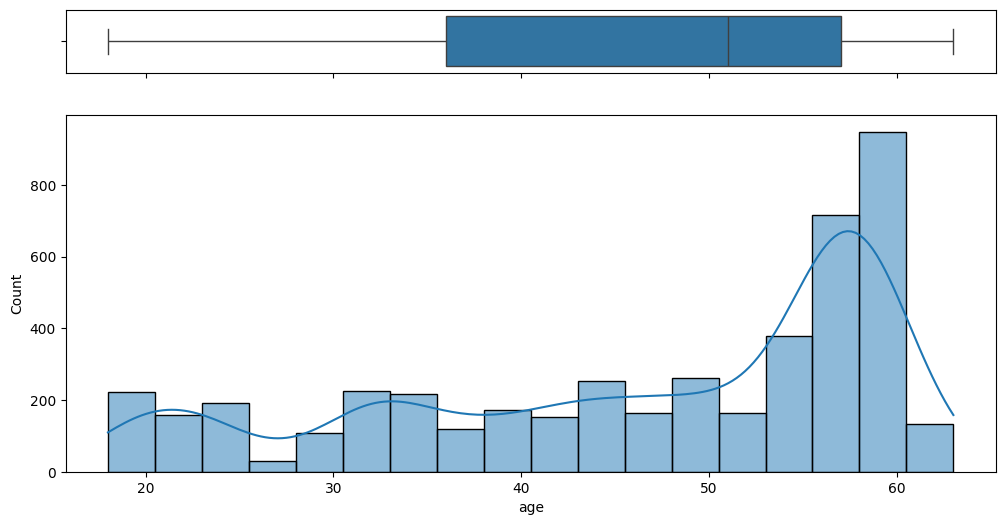

In [12]:
# Plotting the box plot and histogram for 'age'
box_hist(data, 'age')

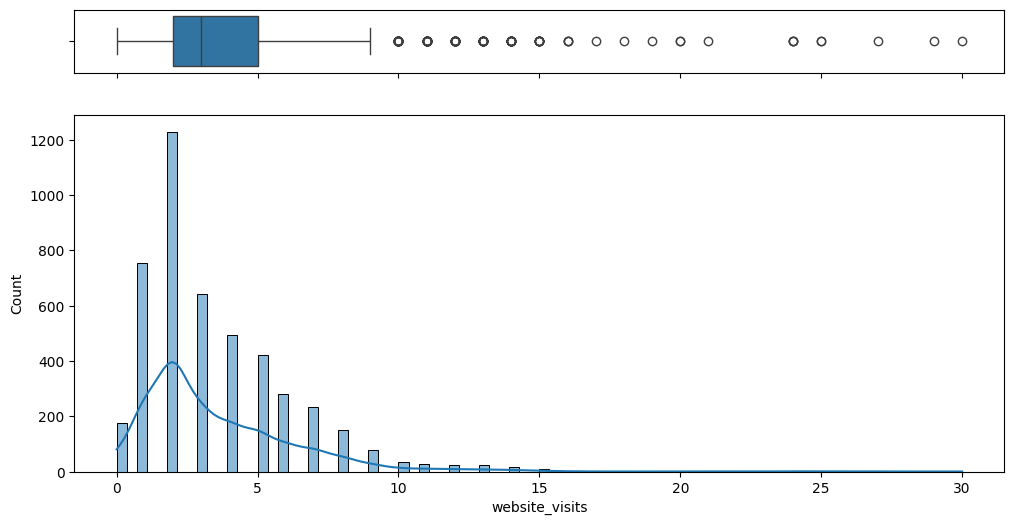

In [ ]:
# Plotting the box plot and histogram for 'website_visits'
box_hist(data, 'website_visits')

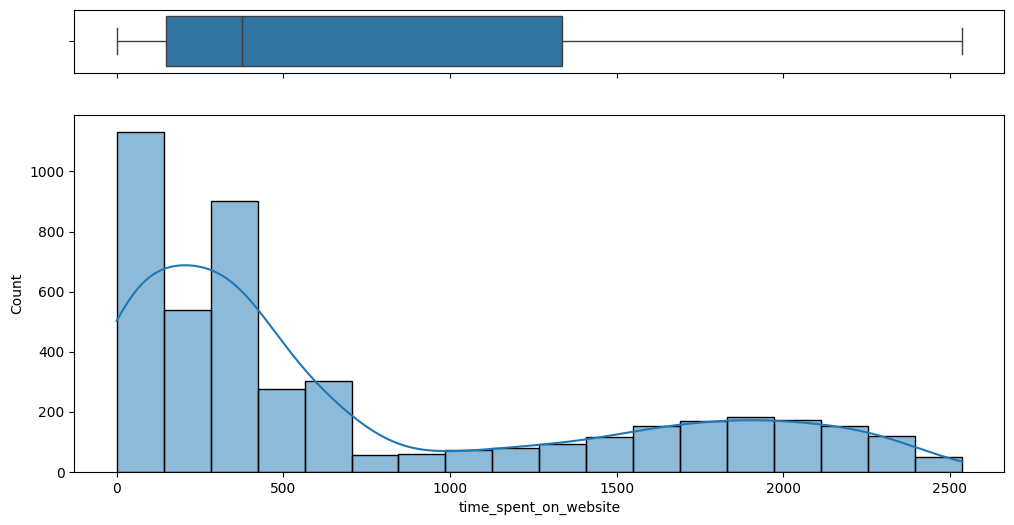

In [ ]:
# Plotting the box plot and histogram for 'time_spent_on_website'
box_hist(data, 'time_spent_on_website')

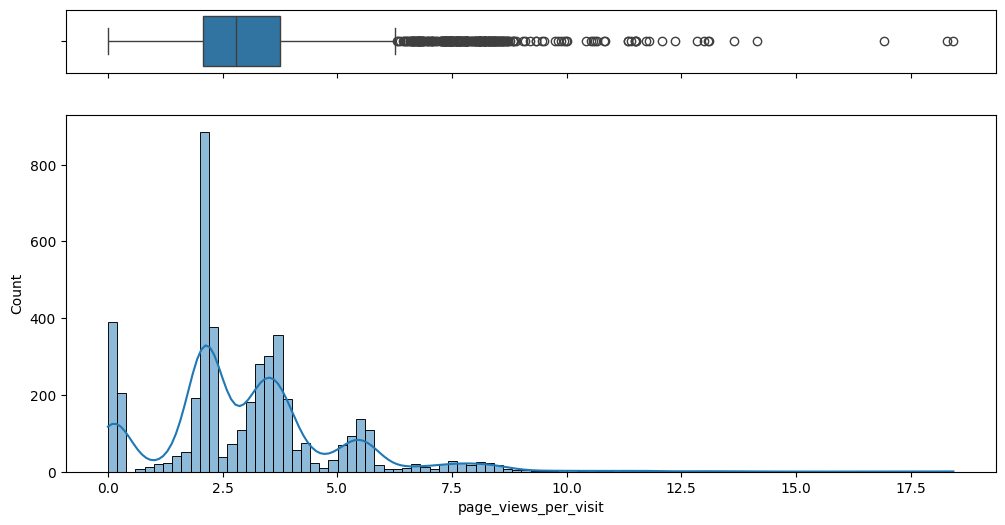

In [ ]:
# Plotting the box plot and histogram for 'page_views_per_visit'
box_hist(data, 'page_views_per_visit')

Observations:
* Along most of the range of age, which goes from 18 to 63, the histogram shows values close to 200 counts. But there is a significant increase in counts between 53 and 60. There are no outliers for the variable 'age'.
* The distribution of 'website_visits' is right-skewed.
* Most leads have visited the website less than 15 times.
* The distribution for 'time_spent_on_website' shows that more than 50% of the values lie between 0 and 700. There are no outliers for this variable.
* Most leads have viewed on average less than 10 pages on the website during the visits. The box plot for this variable shows a lot of values to the right of the upper whisker.

**Exploring the distribution of categorical variables**

In [13]:
# Making a list of the categorical variables
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
# Checking the relative frequencies of each category in the corresponding variable
data[cat_col].nunique()
for col in cat_col:
  print(data[col].value_counts(normalize=True))
  print('--' * 20)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
----------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
----------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
----------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
----------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
----------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
----------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
----------------------------------------
educ

Observations:
* Over 50% of leads are professionals.
* Approximately 2% of leads filled out less than 50% of their profile.
* Nearly 50% the leads had their last interaction with the company via email.
* A small percentage of leads reported seeing ads in print media: less than 11% in newspapers and around 5% in magazines.
* Among the channels used for advertisement, digital platforms were the most visible, yet only 11,4% of leads reported having seen them.
* 15% of leads reported having heard about the company in educational channels.
* Only 2% of leads had heard about the company through referrals.

When we looked at the statistical summary we noticed the distribution of the target variable 'status' is imbalanced. We are going to check the proportion for each category in this variable.

In [14]:
data['status'].value_counts(normalize=True)

,proportion
status,
0,0.701431
1,0.298569


Observation:
* Approximately 70% of leads have not converted into paying customers. We will come back to this topic when preparing the data for modeling.

###Bivariate and multivariate analysis

**Let's look at the distribution of the target variable across the categorical variables**

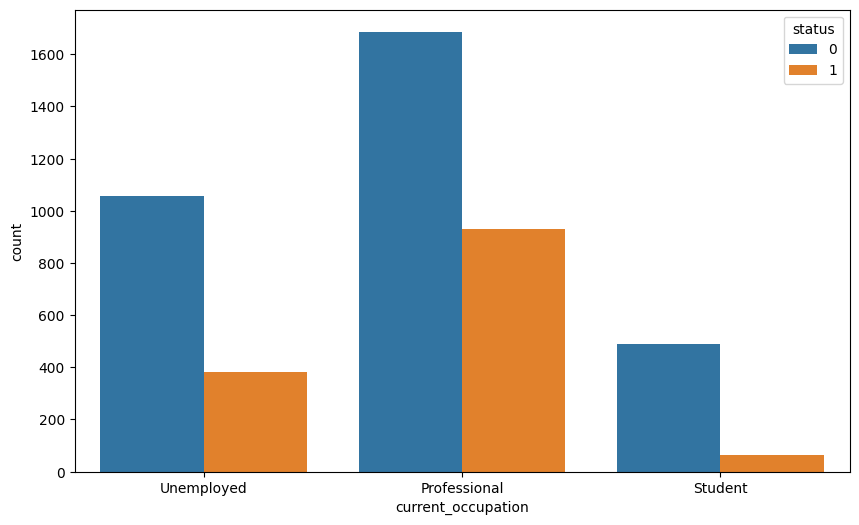

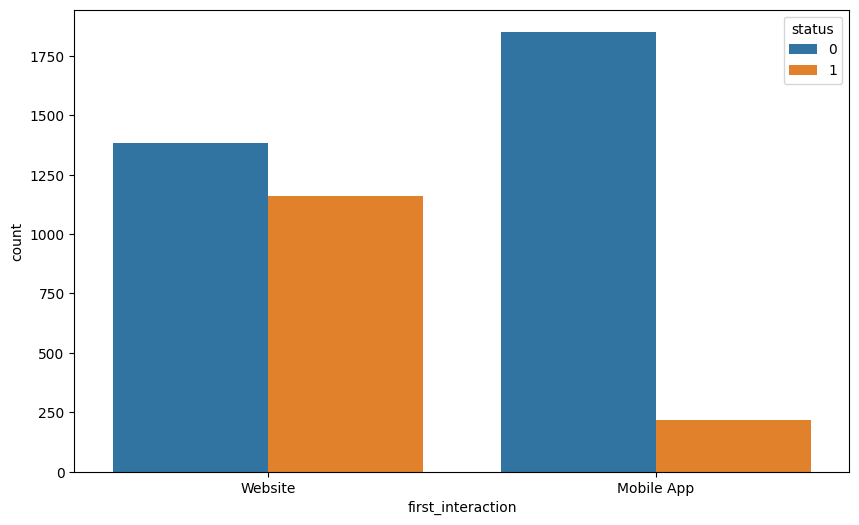

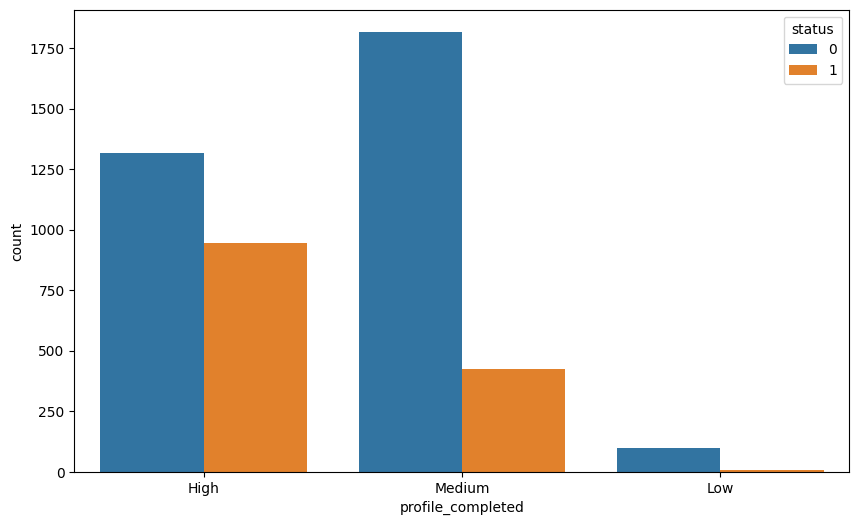

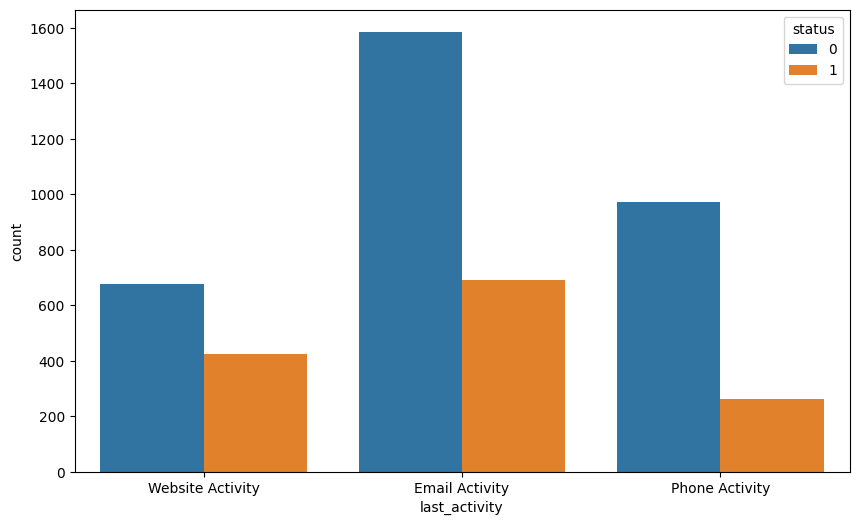

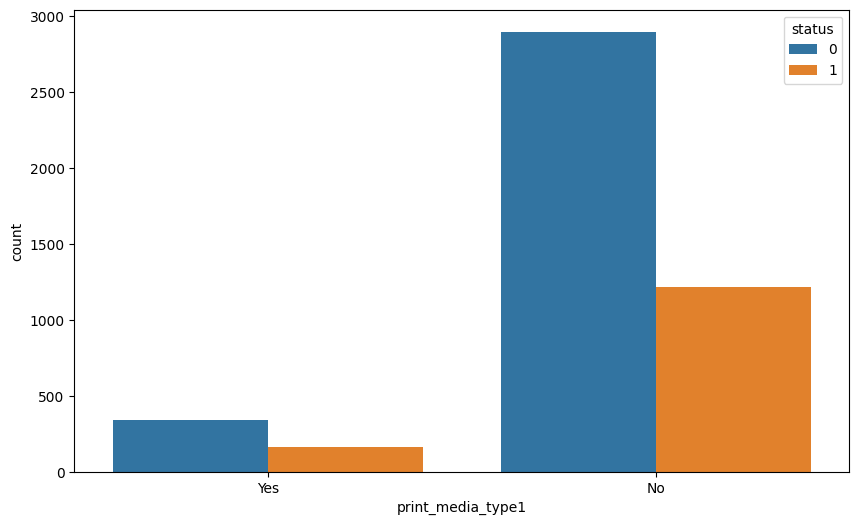

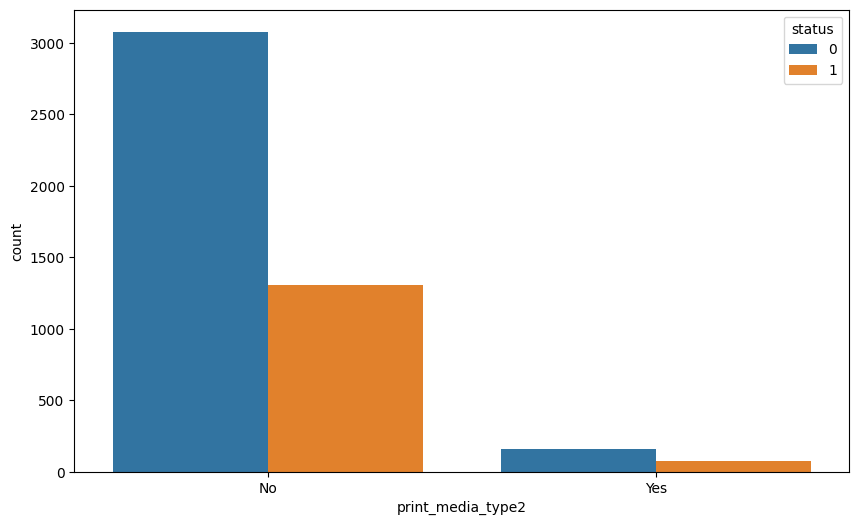

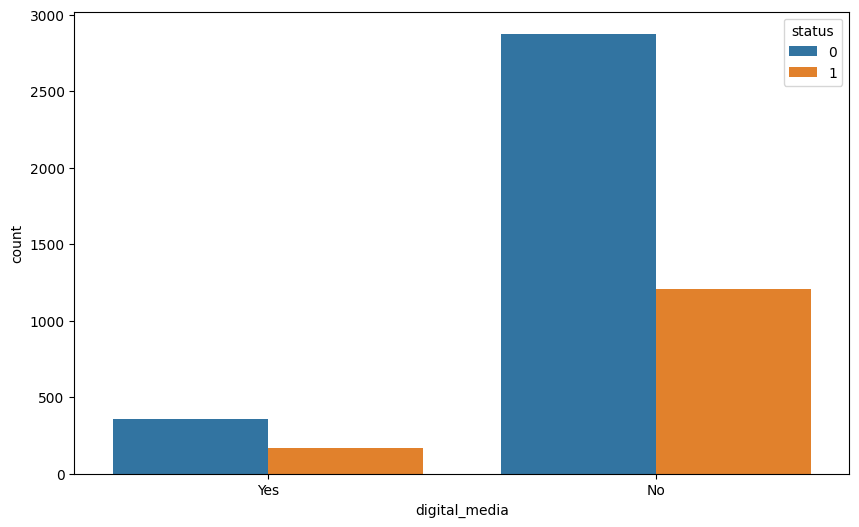

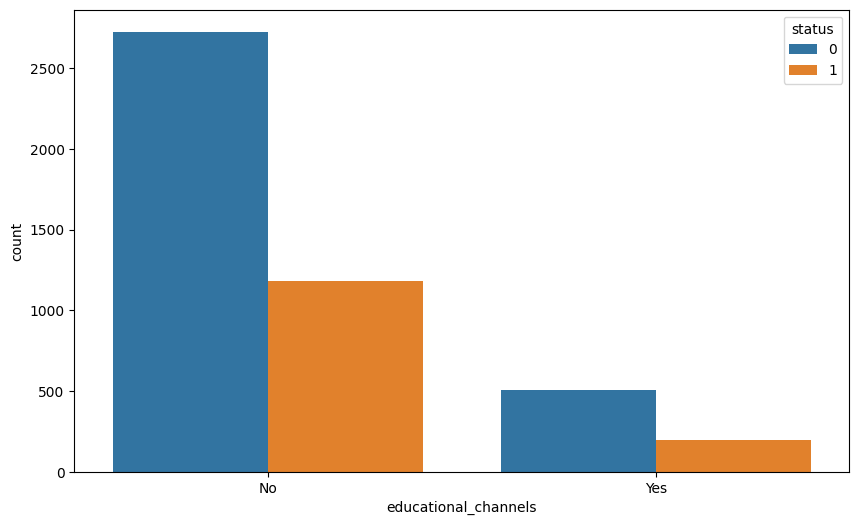

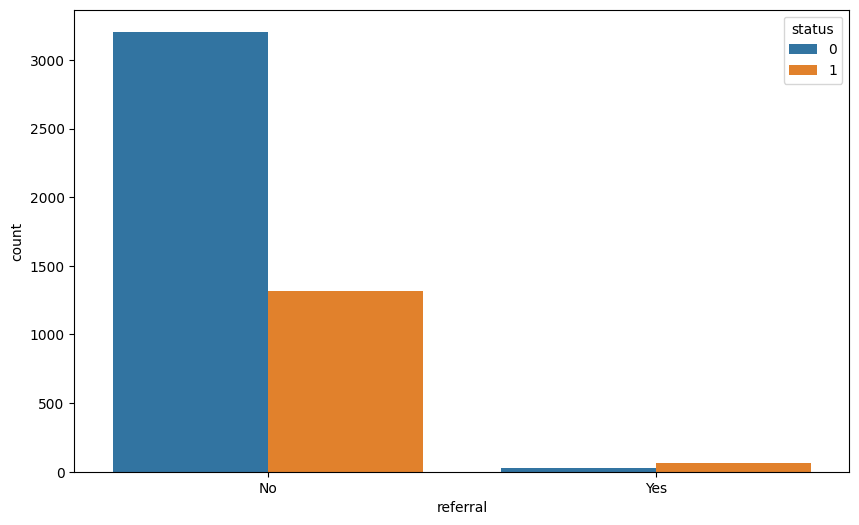

In [ ]:
for col in cat_col:
  plt.figure(figsize=(10,6))
  sns.countplot(data = data, x = col, hue = 'status')
  plt.show()

Observations:
* Over 65% of paying customers are professionals.
* Approximately 45% of leads that had their first interaction through the website were converted to paying customers.
* Only ~10% of leads that interacted first through the mobile app were converted to paying customers.
* Most of the leads filled out at least 50% of their profile. Over 65% of the paying customers filled out more than 75% of their profile.
* Half of the people converted into paying customers had their last interaction via email. Approximately a third of the leads who had their last interaction via email, were converted into paying customers.
* 15% percent of leads had heard about the company in educational channels but less than 30% of those people were converted to paying customers.
* Ads in magazines, newspapers, and digital platforms are not having a significant impact in converting leads to paying customers. Most of these customers had not seen those ads.
* Approximately 95% of leads who converted into paying customers were not referred to the company, but 68% of those who heard about the company through referrals did convert.


**Let's visualize the correlation matrix using a heatmap**

In [15]:
# Grouping numerical columns
num_col = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

<Axes: >

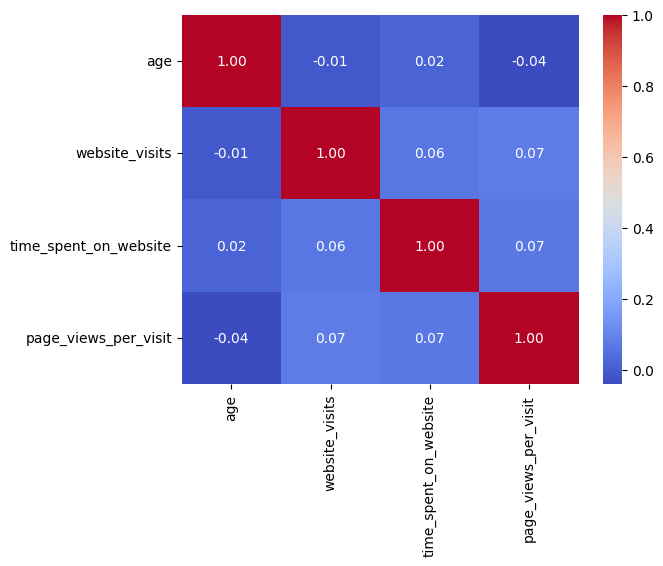

In [16]:
sns.heatmap(data[num_col].corr(), annot=True, fmt='.2f', cmap='coolwarm')

Observations:
* There are no significant correlations among the numerical variables.

**Relationship between 'status' and the numerical variables**

In [17]:
data.groupby('status')[num_col].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Let's explore further the relationship between 'time_spent_on_website' and 'status'**

In [18]:
data.groupby('status')['time_spent_on_website'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3235.0,577.420711,676.340484,0.0,88.0,317.0,646.0,2531.0
1,1377.0,1068.397967,780.856643,0.0,390.0,789.0,1829.0,2537.0


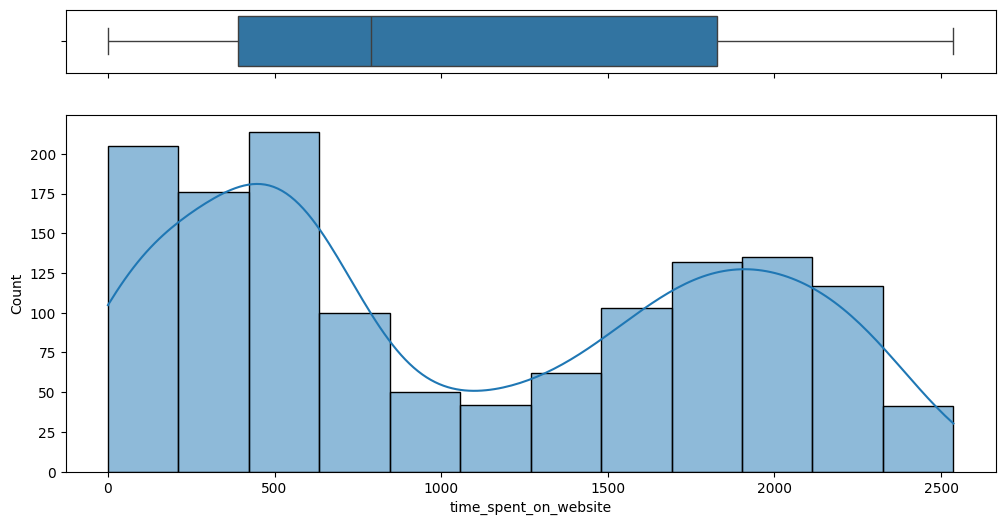

In [19]:
# Plotting the distribution of 'time_spent_on_website' for paying customers
box_hist(data[data['status']==1], 'time_spent_on_website')

Observations:
* On average, paying customers spend nearly twice as much time on the website as leads who have not converted. However, the distribution of this variable, when considering only paying customers, is bimodal. The range from 1500 to 2300 appears to be useful for distinguishing between paying and non-paying customers. Once we build the decision tree, we will confirm whether this is an important variable for the model.

In [20]:
# Function to calculate the conversion rate of the channel
def conv_rate(data, col):
  total = data[data[col] == 'Yes']['status'].count()
  converted = data[(data[col] == 'Yes') & (data['status'] == 1)]['status'].count()
  rate = converted/total
  print(f'Convertion rate for {col} is {np.round(rate,2)}')

In [21]:
# Calculating the conversion rate for each channel
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for col in channels:
  conv_rate(data, col)

Convertion rate for print_media_type1 is 0.32
Convertion rate for print_media_type2 is 0.32
Convertion rate for digital_media is 0.32
Convertion rate for educational_channels is 0.28
Convertion rate for referral is 0.68


**Answers to the questions**

* Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

  **Answer:** Professionals are more likely to participate in the program. The participation of students is very low, which may be caused by the fact that they are already studying and may want to focus on just one program at a time.
* The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

  **Answer:** Yes, the first channel of interaction has an impact. Approximately 45% of leads that had their first interaction through the website were converted to paying customers, while only ~10% of those who interacted first through the mobile app were converted.
* The company uses multiple modes to interact with prospects. Which way of interaction works best?

  **Answer:** The website is the one that works best. Despite having twice as many interactions with leads via email compared to the website, interactions through the website achieve a higher conversion rate.

  Conversion rates: website= 38%, email=30%, phone=21%
* The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

  **Answer:** Referrals have the highest conversion rate with a rate of 68%.
* People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

  **Answer:** Yes, over 65% of the leads converted filled out more than 75% of their profile.

## Data Preprocessing

* The box plot for website_visits shows some data points to the right of the upper whisker.
Based on the histogram we will take a threshold of 15, which is approximately 4 standard deviations from the mean.

* The box plot for page_views_per_visit shows a lot data points to the right of the upper whisker.
Based on the histogram we will take a threshold of 11, which is approximately 4 standard deviations from the mean.




In [22]:
# Calculating the number of rows that will be removed
out_visits = data[data['website_visits']>16]['website_visits'].count()
out_page_views = data[data['page_views_per_visit']>11]['page_views_per_visit'].count()
print(f'Outliers in website_visits: {out_visits}')
print(f'Outliers in page_views_per_visit: {out_page_views}')
print(f'Total: {out_visits + out_page_views}')

Outliers in website_visits: 14
Outliers in page_views_per_visit: 20
Total: 34


In [23]:
# Dropping the rows corresponding to the outliers
data.drop(data[data['website_visits']>16].index, axis=0, inplace=True)
data.drop(data[data['page_views_per_visit']>11].index, axis=0, inplace=True)

In [24]:
data.shape

(4578, 14)

**Creating dummy variables for the categorical variables**

In [25]:
# Creating dummy variables
df = pd.get_dummies(data, columns = cat_col, drop_first = True)

In [26]:
df.shape

(4578, 17)

Observation:
* The number of columns has increased to 17 due to the creation of dummy variables.

###Preparing data for modeling
We will separate the target variable from the independent variables, and then create the training and test sets. The parameter *stratify=Y* will be used to ensure that the datasets maintain approximately the same class proportions as the original dataset.

Since we are going to create a decision tree model, we will not scale the data because this type of model is not sensitive to the scale of the features.

In [27]:
# Separating the target variable from the independent variables
X = df.drop('status', axis=1)
Y = df['status']

In [28]:
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1 , stratify=Y)

##Model evaluation criterion

Before building the decision model, we will define the criterion we will use to evaluate it. ExtraaLearn is a startup aiming to identify the leads that are more likely to convert, so we want to avoid the case where the model predicts that a lead won't convert, when they actually would. This case represents a false negative.

In order to minimize false negatives, we will focus on maximizing the recall of the model.


## Building a Decision Tree model

We are going to build is a decision tree. Before building the model we will create a function to check the performance of every model we build.

In [29]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

We won't set limitations to our first model, we will only set class weights due to the imbalanced distribution of the target variable.

In [30]:
dt = DecisionTreeClassifier(class_weight={0:0.3, 1:0.7})
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2249
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3204
   macro avg       1.00      1.00      1.00      3204
weighted avg       1.00      1.00      1.00      3204



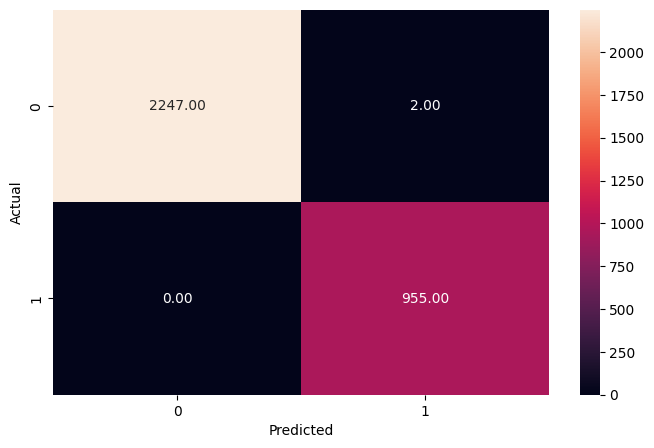

In [31]:
# Checking the performance on the training data
Y_predict_train_dt = dt.predict(X_train)
metrics_score(Y_train, Y_predict_train_dt)

Observations:
* The model correctly classified almost 100% of the samples.
* Since we didn't set limitations, the model increases its complexity trying to fit all the training data without restrictions.
* Once we test its performance on the test set, we will confirm the model is overfitting.


**Let's check the performance of the model on the test set**

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       964
           1       0.66      0.71      0.68       410

    accuracy                           0.80      1374
   macro avg       0.77      0.78      0.77      1374
weighted avg       0.81      0.80      0.81      1374



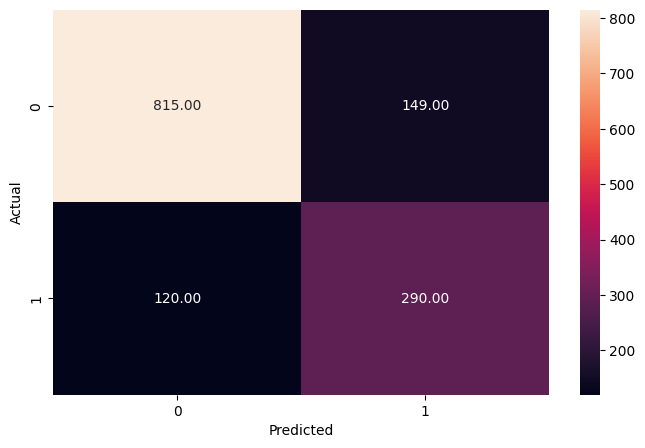

In [33]:
Y_predict_test_dt = dt.predict(X_test)
metrics_score(Y_test, Y_predict_test_dt)

Observations:
* The recall decreased from 1 to 0.71.
* We have confirmed that the model is overfitting, so we need to tune the hyperparameters to build a model that generalizes better.

###Tuning the hyperparameters

We will set some restrictions to the hyperparameters of the model to control its complexity. We will use the following parameters, and find the best value for each of them running a grid search:

* max_depth: maximum depth of the tree.
* min_samples_leaf: minimum number of samples required to be at a leaf node.
*min_samples_split: minimum number of samples required to split an internal node.

We will use 2 criteria: gini and entropy.



In [34]:
# Setting the type of classifier and class weights
dt_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(5, 10, 2),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25],
              'min_samples_split': [10, 30, 50]
             }

# Running the grid search
grid = GridSearchCV(dt_estimator, parameters, cv=5,scoring='recall')
grid = grid.fit(X_train, Y_train)

# Setting the classifier to the best combination of parameters
dt_estimator = grid.best_estimator_

# Fittting the best algorithm to the data.
dt_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       min_samples_leaf=5, min_samples_split=50,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2249
           1       0.69      0.87      0.77       955

    accuracy                           0.84      3204
   macro avg       0.81      0.85      0.83      3204
weighted avg       0.86      0.84      0.85      3204



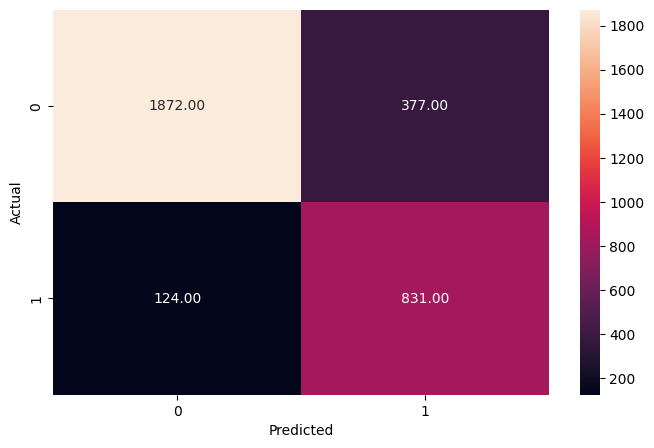

In [35]:
# Checking the performance on the training set
Y_predict_train_dt = dt_estimator.predict(X_train)
metrics_score(Y_train, Y_predict_train_dt)

Observations:
* In this case, the model is unable to correctly classify 100% of the training samples because we have restricted its complexity.

**Let's check the performance of the model on the test set**

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       964
           1       0.66      0.87      0.75       410

    accuracy                           0.83      1374
   macro avg       0.80      0.84      0.81      1374
weighted avg       0.85      0.83      0.83      1374



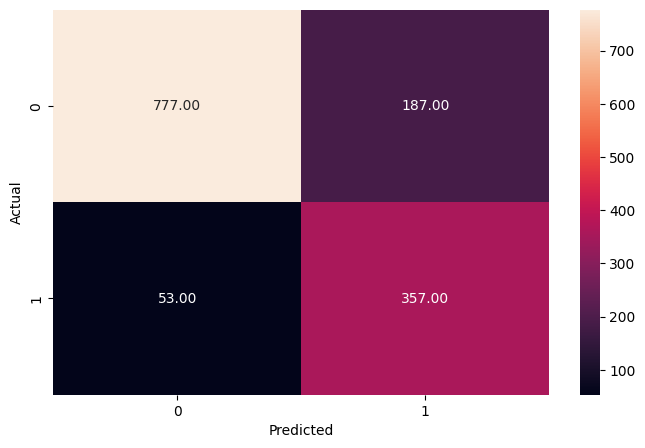

In [36]:
# Checking the performance on the test set
Y_predict_test_dt = dt_estimator.predict(X_test)
metrics_score(Y_test, Y_predict_test_dt)

Observations:
* We got a recall of 0.87 on the test set.
* The results are similar to those obtained with the training set. This model is generalizing well.

**Visualizing the tree**

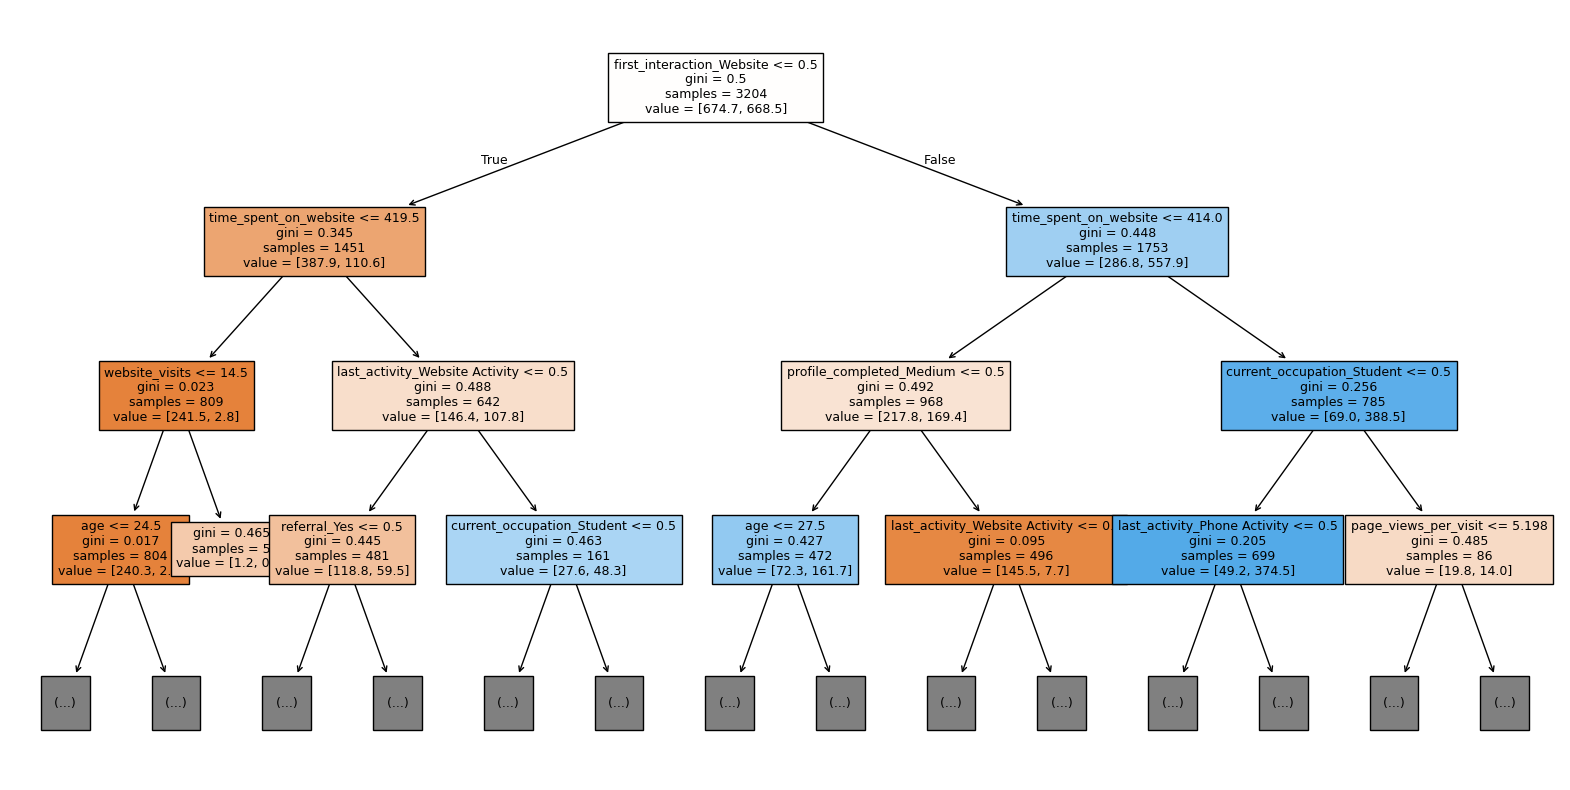

In [37]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_estimator,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

**Feature importance of the model**

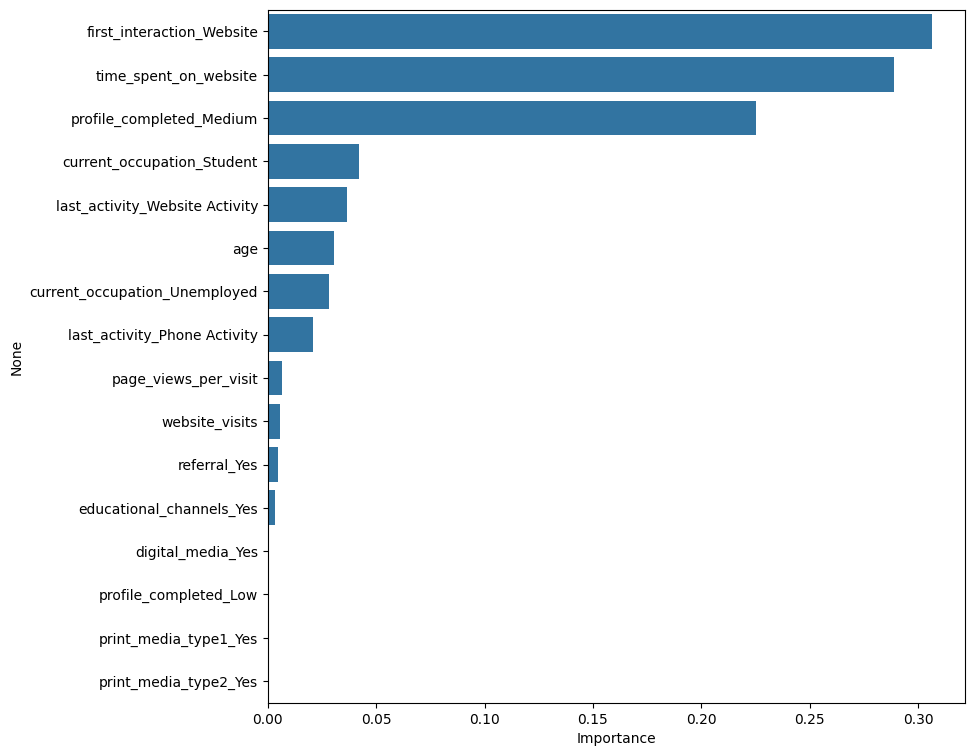

In [38]:
importances = dt_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9,9))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

Observations:
* The most important features in our decision tree are first_interaction_Website, time_spent_on_website, and profile_completed_Medium.
* The ads in both print and digital media are not relevant on the process of leads conversion.
* 3 out of the top 5 features are related to the company's website. This result shows that the most important channel is the website.

## Building a Random Forest model

Let's build a random forest model and compare it with our decision tree.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2249
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3204
   macro avg       1.00      1.00      1.00      3204
weighted avg       1.00      1.00      1.00      3204



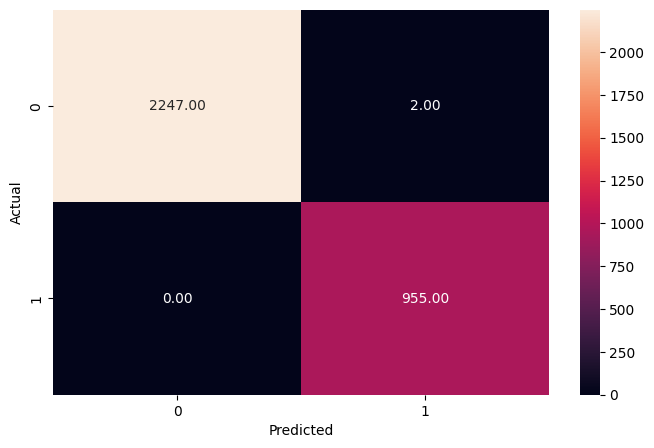

In [39]:
# Initializing the model
rf = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)
# Fitting the model on the training data
rf.fit(X_train, Y_train)
# Checking the performance on the training set
Y_predict_train_rf = rf.predict(X_train)
metrics_score(Y_train, Y_predict_train_rf)

Observations:
* Similar to the case of the decision tree, the random forest correctly classifies all samples when we don't set restrictions to the model.
* The model may be overfitting; we will confirm this by checking the performance on the test set.

**Let's check the performance of the model on the test set**

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       964
           1       0.77      0.69      0.73       410

    accuracy                           0.85      1374
   macro avg       0.82      0.80      0.81      1374
weighted avg       0.84      0.85      0.84      1374



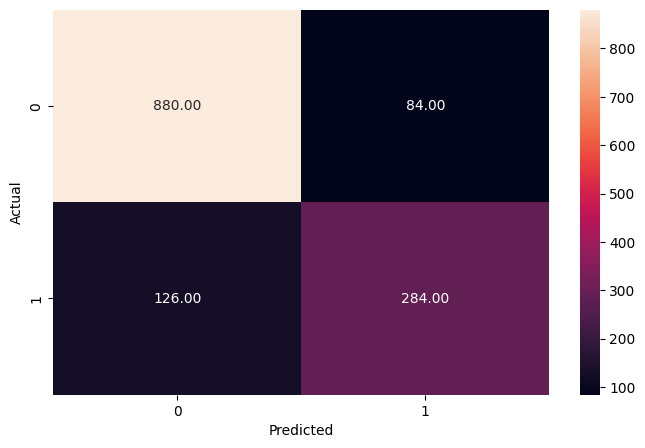

In [40]:
# Checking the performance on the test set
Y_predict_test_rf = rf.predict(X_test)
metrics_score(Y_test, Y_predict_test_rf)

Observations:
* We got a recall of 0.69 on the test set.
* The classifier is overfitting. Next, we will tune the hyperparameters of the model.

###Tuning the hyperparameters

We need to tune the model because it is overfitting. The parameters we are going to tune are the following:
* n_estimators: number of tress in the forest.
* max_features: number of features to consider when looking for the best split.



In [41]:
# Initializing the model
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [50, 150, 300],
        "max_depth": np.arange(5, 10, 2),
        "criterion": ['gini', 'entropy'],
        "max_features": ['sqrt'],
}

# Run the grid search
grid_rf = GridSearchCV(rf_estimator, params_rf, scoring = 'recall', cv = 5)
grid_rf = grid_rf.fit(X_train, Y_train)
# Set the classifier to the best combination of parameters
rf_estimator = grid_rf.best_estimator_
# Fit the model to the training set
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, n_estimators=300, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      2249
           1       0.67      0.88      0.76       955

    accuracy                           0.84      3204
   macro avg       0.81      0.85      0.82      3204
weighted avg       0.86      0.84      0.84      3204



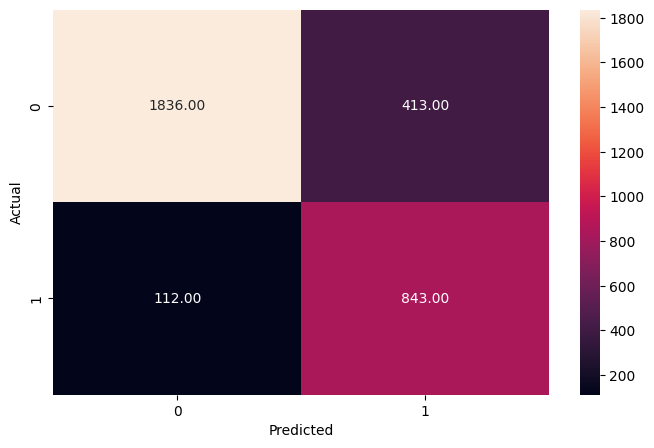

In [42]:
# Checking the performance on the training set
Y_predict_train_rf = rf_estimator.predict(X_train)
metrics_score(Y_train, Y_predict_train_rf)

Observation:
* Now that the model has been tuned, it correctly classifies less than 100% of the samples, unlike the first random forest model.

**Let's check the performance of the model on the test set**

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       964
           1       0.64      0.89      0.75       410

    accuracy                           0.82      1374
   macro avg       0.79      0.84      0.80      1374
weighted avg       0.85      0.82      0.83      1374



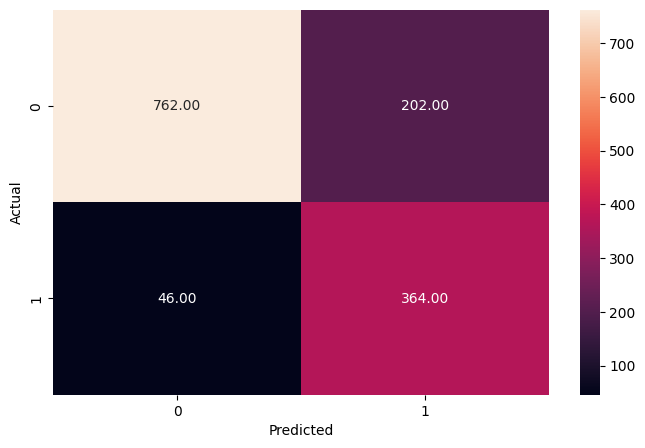

In [43]:
# Checking the performance on the test set
Y_predict_test_rf = rf_estimator.predict(X_test)
metrics_score(Y_test, Y_predict_test_rf)

Observations:
* We built a decision tree and a random forest model without setting restrictions on their complexity, and we got overfitting models, so we had to tune some of their hyperparameters.
* The tuned decision tree model achieved a recall of 0.87 and precision of 0.66 on the test set.
* The tuned random forest model achieved a recall of 0.89 and precision of 0.64 on the test set.
* We will not plot the features importance for the random forest because it is not an interpretable model, so we will work with the information obtained from the decision tree.

## Actionable Insights and Recommendations

* Most paying customers had their first interaction through the website, so the company should **prioritize leads who first explore the website** over those who first interact through the mobile app.
* **Professional leads are more likely to convert** than students, so the company should allocate fewer resources to students and more to professionals. The low proportion of students among the paying customers may be due to their desire to complete their current program before enrolling in a new one.
* People who **complete more than 75% of their profile** are more likely to convert to paying customers. The company should prioritize these leads over those who complete less than 50%.
* Most leads had not seen the company's ads in magazines, newspapers, or digital platforms. Among these channels, digital platforms was the most visible, yet only 11% of leads reported having seen it. The company should **stop advertising in magazines and newspapers, and reallocate that budget to improving the ads on digital platforms**.
* Referrals have a conversion rate close to 70%, so the company should **encourage customers and employees to refer friends and family**. A bonus or discount could be offered to incentivize them to refer more people.
* Despite the tuned random forest model having a recall slightly higher than that of the decision tree model, I recommend **putting the decision tree model into production because it will help the company identify the factors driving lead conversion**.

###Profile of leads likely to convert
Professionals who have their first interaction through the website, fill out more than 75% of their profile, heard about the company through referrals, and their spent time on the website is between 1,500 and 2,300.
